<a href="https://colab.research.google.com/github/Mehmetcan420/-dev/blob/main/%C3%96DEV_GORUNTU_%C4%B0SLEME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

371 463 3
[[ 6.123234e-17  1.000000e+00  4.600000e+01]
 [-1.000000e+00  6.123234e-17  4.160000e+02]]


(np.float64(-0.5), np.float64(462.5), np.float64(370.5), np.float64(-0.5))

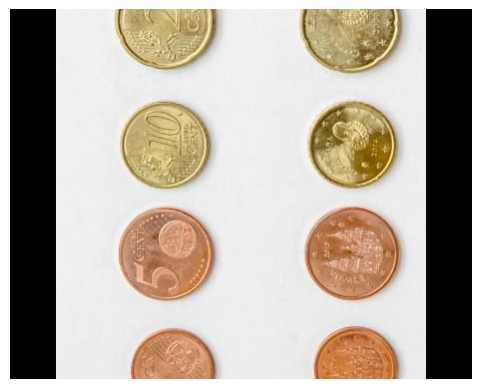

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

bgr = cv2.imread("c.jpg")
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

h, w, c = rgb.shape
print(h, w, c)

plt.imshow(rgb)
plt.axis("off")  # eksenleri kapat
plt.savefig("elon_modifiye.png")

tx, ty = 800, 400   # x yönünde 800 y yönünde 400 pixel kaydır
M = np.float32([[1, 0, tx],
              [0, 1, ty]])

modifiye_para = cv2.warpAffine(rgb, M, (w,h))
plt.imshow(modifiye_para)
plt.axis("off")  # eksenleri kapat


# döndürme
teta = 90
olcek = 1
merkez = (w//2, h//2)
M = cv2.getRotationMatrix2D(merkez, teta, olcek)
print(M)
modifiye_para = cv2.warpAffine(rgb, M, (w,h))
plt.imshow(modifiye_para)
plt.axis("off")  # eksenleri kapat


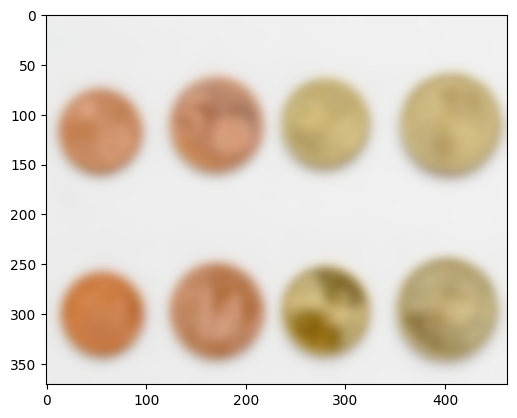

In [9]:
# Resim bulanıklaştırma
# kernel değeri tek olmalı ve büyük değer falza bulanık demek
# yüksek frekanslardan kurtarıyor
bulanik_para = cv2.GaussianBlur(rgb, (33,33), 0)
plt.imshow(bulanik_para)

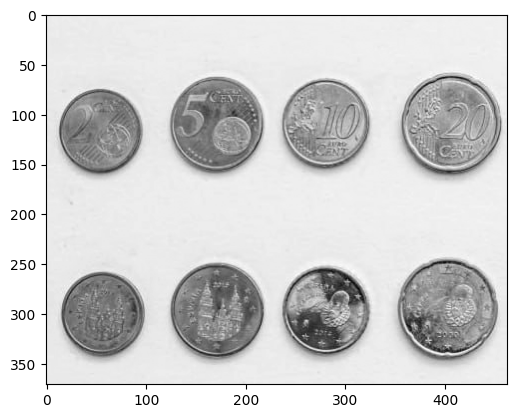

In [10]:
gri_para = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(gri_para, cmap="gray")

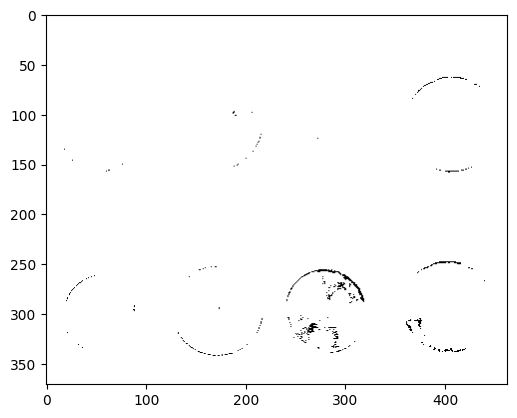

In [11]:
_, binary_para = cv2.threshold(gri_para, 90, 255, cv2.THRESH_BINARY)
plt.imshow(binary_para, cmap="gray")

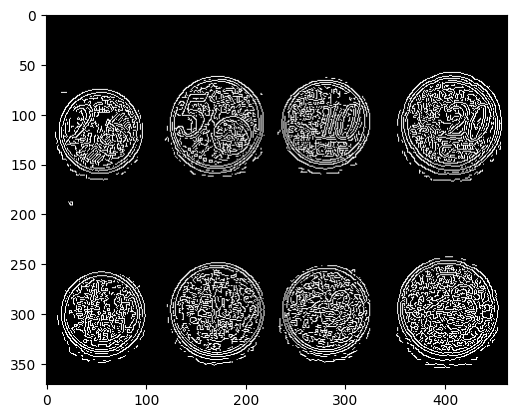

In [12]:
kenar_para = cv2.Canny(gri_para, 30, 60)
plt.imshow(kenar_para, cmap="gray")

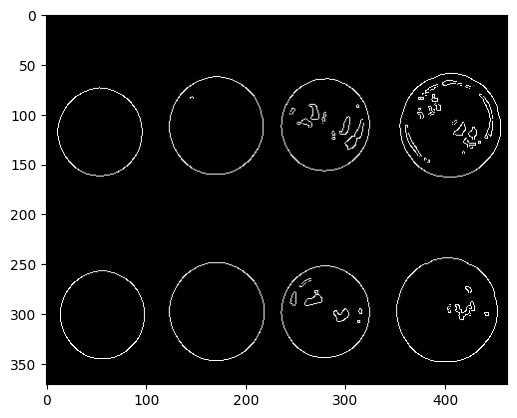

5811.0
6369.0
7315.0
8259.5
5807.0
6406.5
7244.5
8199.5


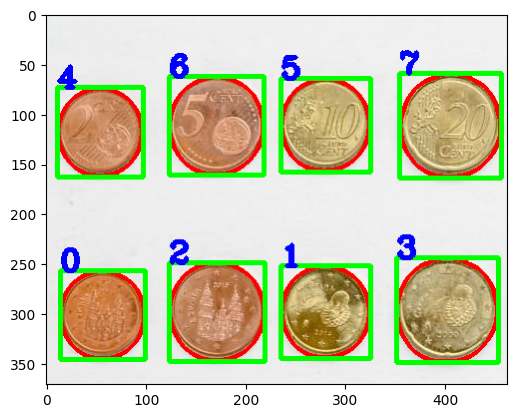

In [30]:
iskambil_bgr = cv2.imread("c.jpg")
para_gri = cv2.cvtColor(iskambil_bgr, cv2.COLOR_BGR2GRAY)
bulanik_para = cv2.GaussianBlur(para_gri, (5,7), 30)
_, iskambil_bin = cv2.threshold(bulanik_para, 190, 255, cv2.THRESH_BINARY)
kenar_iskambil = cv2.Canny(iskambil_bin, 80, 160)
#kenar_iskambil = cv2.dilate(kenar_iskambil, (-1,1), iterations=60)
plt.imshow(kenar_iskambil, cmap="gray")
plt.show()
contours, hierarchy = cv2.findContours(kenar_iskambil,  cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
iskambil_rgb = cv2.cvtColor(iskambil_bgr, cv2.COLOR_BGR2RGB)
kontorlu_iskambil = cv2.drawContours(iskambil_rgb, contours, -2, (255,0,0), 3)

for i, kontor in enumerate(contours):
  if cv2.contourArea(kontor) > 180:
    x, y, w, h = cv2.boundingRect(kontor)
    cv2.rectangle(kontorlu_iskambil, (x,y), (x+w, y+h), (0,255,0), 3)
    cv2.putText(kontorlu_iskambil, str(i), (x,y), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 4)
    print(cv2.contourArea(kontor))
plt.imshow(kontorlu_iskambil)
